In [14]:
# setup

# importing for later use
from math import * 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pydataset import data


In [15]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

In [16]:
# Simulation Based Approach
# Example: Codeup starts producing a scratch off lottery ticket called "Golden Codys". The odds of winning a prize must be advertised to the state, and since we are manufacturing the tickets, we know exactly how many winners and losers there are.
# Theory: Our population is the 1000 tickets we have manufactured
# Implementation: Create a boolean pandas Series we model win with true and lose with false
# because of this, we can take the mean of a series to measure the likelihood of winning

The actual probability of winning is 0.25


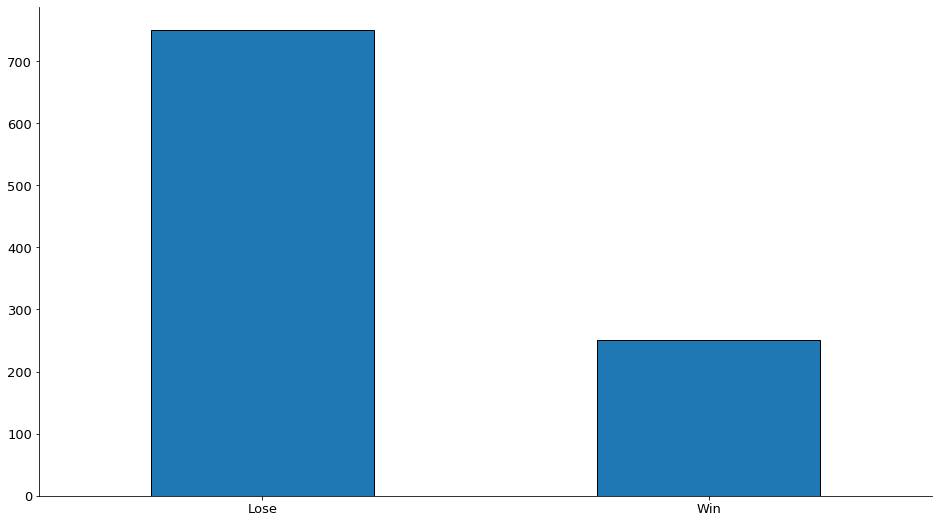

In [17]:
# creating series that represent winning and losing tickets 
lotterytickets = pd.Series([True] * 250 + [False] * 750)

# creating bar plot the displays the amount of winning and losing tickets
lotterytickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()
plt.xticks(rotation=0)

# display average of winning (true) tickets ie. odds of winning per ticket
print(f'The actual probability of winning is {lotterytickets.mean()}')

In [18]:
# Scenario: Each student in a classroom is given a Golden Cody scratch off at random 

# Theory: We we take a random sample and calculate the win rate, we won't expect to see exactly 25% 
# even though we know that is what the overall rate is.

# Examples of biased samples:
# non-response: people that don't respond are a diff population
# undercoverage: some groups aren't well represented
# voluntary: people volunteer for surveys
# leading questions
# social desirability

# Implementation: Use the .sample method on our series to randomly choose 25 tickets, 
# representing 25 students in a classroom. 
# Use .mean to calculate what percentage of the values are True, or are winning tickets.

# setting number of tickets for sample to 25
n_tickets = 25

# taking sample of 25 tickets and finding percent of winning tickets (ie. average chance of winning from a random ticket in the sample)
lotterytickets.sample(n_tickets).mean()

0.12

In [19]:
# Scenario: each student in 4 different cohorts is given a Golden Codys scratch off ticket, 
# we want to calculate the win rate for each classroom.
# Theory: it is unlikely any classroom will have exactly a 25% winrate, 
# instead we will see slightly different numbers for each classroom.
# Implementation: loop through a range of 5 to get a sample and calculate the winrate 5 times. 
# Each of the 5 numbers produced represents the calculated winrate for one classroom of 25 students.

# creating list of average percent of winning tickets after taking 5 samples of 25 tickets
[lotterytickets.sample(n_tickets).mean() for num in range(5)]

[0.28, 0.28, 0.08, 0.24, 0.36]

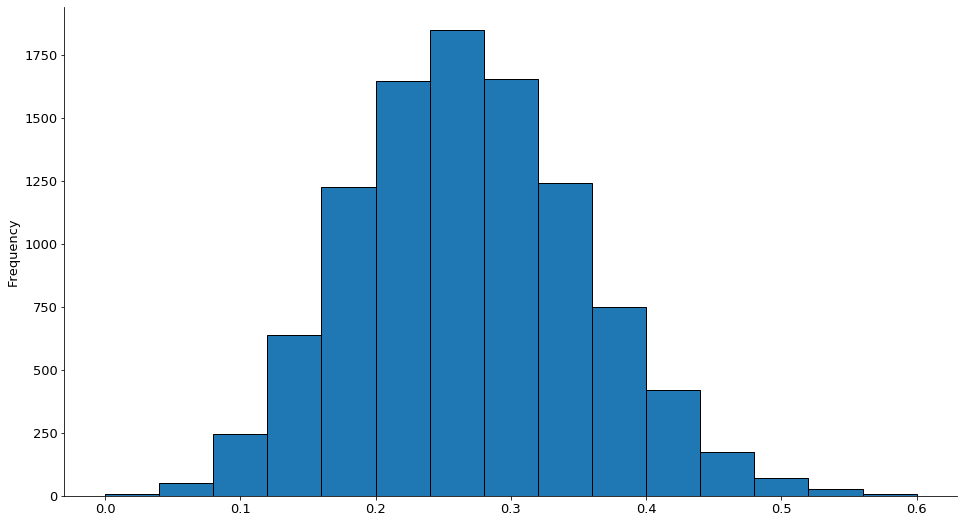

In [20]:
# Theory: The winrates we see aren't ever exactly 25%, but we would expect the rate to be closer to 25% 
# than further away. That is, it is more likely that a classroom will come up with a win rate of 24% 
# than a winrate of 10%.

# If we were to repeat this experiment a whole bunch of times, say 10,000, we would find 
# that the calculated winrates are, in fact, normally distributed.

# That is, we would expect the calculated average winrate for a classroom to follow a normal distribution, 
# even though the underlying random process is not based on a normal distribution

# Implementation: To visualize this, we'll create a series full of calculated winrates for 10,000 classrooms, 
# each classroom made up of 25 students. 
# That is, we will simulate 10,000 classrooms of 25 students getting Golden Codys 
# and calculate the average winrate for each of the 10,000 classrooms.

# creating series with 10000 values, each represents the mean found in a sample of 25 tickets 
# can also represent the average winrate among 10,000 classes that each recieved 25 tickets
calc_winrates = pd.Series([lotterytickets.sample(n_tickets).mean() for num in range(10000)])

# plotting as histogram
calc_winrates.plot.hist(bins=15)

In [21]:
# Theory

# The above visual represents the sampling distribution for the winrate of Golden Codys, based on a class of 25.

# The Central Limit Theorm says that sampling distribution will be normally distributed even if 
# the underlying random variable isn't.

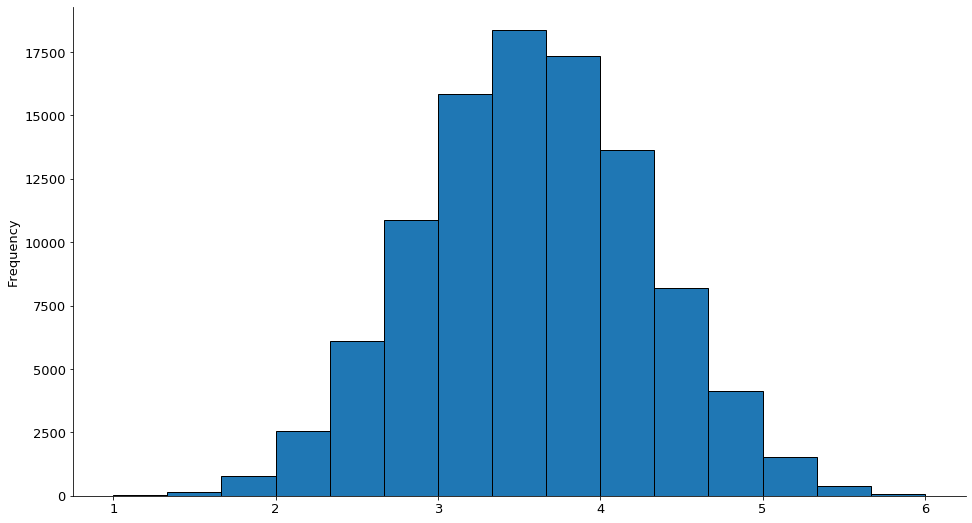

In [22]:
# Mini Exercise -- CLT
# Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.
# Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. 
# Store each of the 10,000 averages in a list.
# Plot the distribution of the calculated averages. 
# What do you notice about the shape of the distribution of calculated averages? 

# creating 100000 simulations of 6 dice being rolled
rolls = np.random.choice([1,2,3,4,5,6], [100000 , 6])

# finding the avg of each simulation results
roll_avg = pd.Series(rolls.mean(axis = 1))

# plotting as histogram
roll_avg.plot.hist(bins=15)

# Answer: It is a normal distribution.


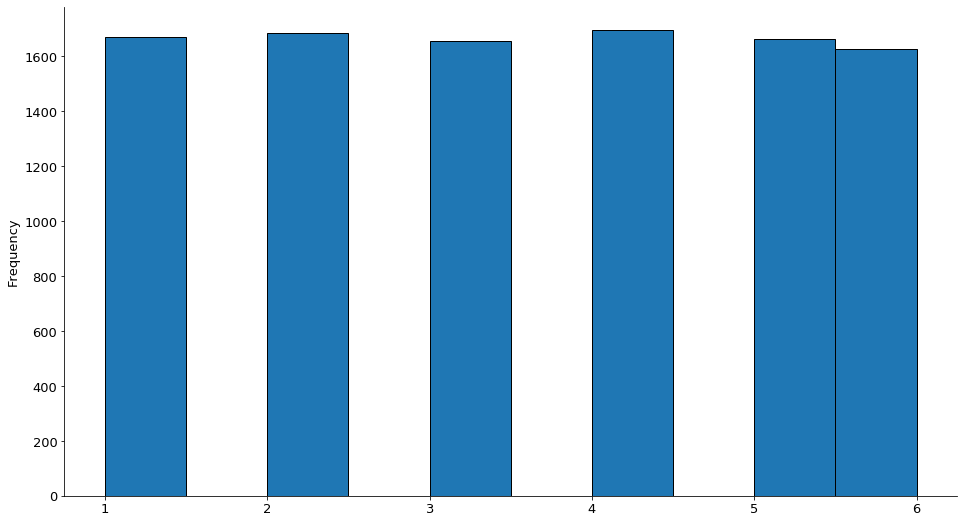

In [23]:
# What kind of distribution is the underlying random variable (i.e. one dice roll?)

# creating 10000 simulations of one die being rolled
single_rolls = np.random.choice([1,2,3,4,5,6], [10000 , 1])

# converting to series, don't need to use mean since there is only one value per roll
single_roll_avg = pd.Series(single_rolls.sum(axis = 1))

# plotting as histogram
single_roll_avg.plot.hist(15)

# Answer: It is a uniform distribution.

In [24]:
# Theory: in practice, we won't have 10,000 samples to work with, but rather just 1. 
# We can stil rely on the sampling distribution being normally distributed, and this has some intersting properties.
# the mean of the sampling distribution of the sample means will be the "true" mean
# the variance of the sampling distribution is the population variable divided by the sample size
# the standard deviation of the sampling distribution is pqn‾‾‾√ (for our example), aka the standard error

se = math.sqrt((.25 * .75) / n_tickets)

# Let's compare our calculated standard error (i.e. the standard deviation of the sample means) to the 
# experimental value:

# Let's compare our calculated standard error (i.e. the standard deviation of the sample means) 
# to the experimental value:

print('SE:                 %.4f' % se)
print('sample_means.std(): %.4f' % calc_winrates.std())

NameError: name 'math' is not defined

In [25]:
# That the sampling distribution being normally distributed is very powerful and has important implications:

# confidence intervals for population parameter estimates (e.g. estimating the population mean)
# as n goes up, interval becomes smaller
# as certainty goes up, interval becomes larger
# 99% of calculated CIs will contain the true mean (e.g. if we ran simulations and re-sampled, 99% of the simulations' calculated CIs would contain the true mean)
# hypothesis testing
# One classroom calculates their winrate at 20% and claims the tickets were distributed unfairly. 
# What is the likelihood we observe a 20% (or smaller) winrate just due to chance?

# finding mean and sdev 
mean = calc_winrates.mean()
sd = calc_winrates.std()

# finding probability of a classroom having a batch of tickets with a winrate of 20% or lower
# since the probability is 28%, this is very far from an alpha value of .05 so we know its reasonable
# to expect that they could have this win percentage
stats.norm(mean, sd).cdf(.2)

# The probability we've calculated is a p-value. 
# The likelihood that we observe the data that we have if the null hypothesis is true.

0.28283511827393837

In [26]:
# Null and Alternative Hypothesis
# H0 : status quo: no difference or no effect
# Ha : alternative: there is a difference or effect
# whether Ha is ≠ , <, >, determines one-tailed vs two-tailed test
# < or > == one-tailed
# ≠ == two-tailed

In [27]:
# Mini Exercise -- Null + Alternate Hypothesis and Errors
# For each of the following scenarios: refine the question, generate a null and alternative hypothesis, 
# and give examples of true positives, true negatives, type I and type II errors.

In [28]:
# 1) Are the average grades in web development vs data science classes different?

# Q: Are the average grades in the WD class significantly different than the average grades of the DS class?
# N0: There is no difference between the average grades of the WD and DS classes
# Na: There is a significant difference between the average grades of the WD and DS classes

# TP: We conclude that there is a significant difference in grades between the WD and DS classes and there is a difference.

# TN: We conclude that there is no significant difference in grades between the WD and DS classes and there is no difference. 

# Type I: We conclude that there is a significant difference in grades between the WD and DS classes and there is no difference. 

# Type II: We conclude that there is no significant difference in grades between the WD and DS classes and there is a difference. 


In [29]:
# Is there a relationship between how early a student shows up to class and their grade?

# Q: Is there a difference the average grades of students who show up to class prior to 9AM (early) and those who show up at or later than 9am (not early)?
# N0: There is no difference in the average grades of students who show up early and those who dont show up early
# Na: There is a difference in the average grades of students who show up early and those who dont show up early

# TP: We conclude that there is a difference in the average grades of students who show up early and those who dont show up early and there is a difference

# TN: We conclude that there is no difference in the average grades of students who show up early and those who dont show up early and there is no difference

# Type I: We conclude that there is a difference in the average grades of students who show up early and those who dont show up early and there is no difference

# Type II: We conclude that there is no difference in the average grades of students who show up early and those who dont show up early and there is a difference

In [30]:
# Are web dev or data science students more likely to be coffee drinkers?

# Q: Is there a significant difference between the average percent of coffee drinkers in the WD and DS classes?
# N0: There is no significant difference between the average percent of coffee drinkers in the WD and DS classes?
# Na: There is a significant difference between the average percent of coffee drinkers in the WD and DS classes?

# TP: We conclude that there is a significant difference between the average percent of coffee drinkers in the WD and DS classes and there is

# TN: We conclude that there is no significant difference between the average percent of coffee drinkers in the WD and DS classes and there is not

# Type I: We conclude that there is a significant difference between the average percent of coffee drinkers in the WD and DS classes and there is not

# Type II: We conclude that there is no significant difference between the average percent of coffee drinkers in the WD and DS classes and there is

In [31]:
# For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), 
# then give an example of what a true positive, true negative, type I and type II errors would look like. 
# Note that some of the questions are intentionally phrased in a vague way. 
# It is your job to reword these as more precise questions that could be tested.

In [32]:
# Has the network latency gone up since we switched internet service providers?

# Q: Has the amount of latency we experience significantly increased since we switched internet service providers?
# N0: the amount of latency we experience has not significantly increased since we switched internet service providers
# Na: the amount of latency we experience has significantly increased since we switched internet service providers

# TP: We conclude that the amount of latency we experience has  significantly increased since we switched internet service providers and it has

# TN: We conclude that the amount of latency we experience has not significantly increased since we switched internet service providers and it has not

# Type I: We conclude that the amount of latency we experience has significantly increased since we switched internet service providers and it has not

# Type II: We conclude that the amount of latency we experience has not significantly increased since we switched internet service providers when it has

In [33]:
# Is the website redesign any good?

# Q: Has the average amount of click-throughs we receive on average increased since the website redesign?
# N0: The average amount of click-throughs we receive on average has not increased since the website redesign
# Na: The average amount of click-throughs we receive on average has increased since the website redesign

# TP: We conclude that the average amount of click-throughs we receive on average has increased since the website redesign and it has

# TN: We conclude that the average amount of click-throughs we receive on average has not increased since the website redesign and it has not

# Type I: We conclude that the average amount of click-throughs we receive on average has increased since the website redesign and it has not

# Type II: We conclude that the average amount of click-throughs we receive on average has not increased since the website redesign and it has

In [34]:
# Is our television ad driving more sales?

# Q: Has our average amount of sales increased since our new television ad aired?
# N0: Our average amount of sales has not increased since our new television ad aired
# Na: Our average amount of sales has increased since our new television ad aired

# TP: We conclude that our average amount of sales has increased since our new television ad aired and it has

# TN: We conclude that our average amount of sales has not increased since our new television ad aired and it has not

# Type I: We conclude that our average amount of sales has increased since our new television ad aired and it has not

# Type II: We conclude that our average amount of sales has not increased since our new television ad aired and it has

In [37]:
# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
# A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
# A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
# Use a .05 level of significance.

m1 = 90
s1 = 15

m2 = 100
s2 = 20

n1 = 40
n2 = 50

degf = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (m1 - m2) / (s_p * sqrt(1/n1 + 1/n2))

p = stats.t(degf).cdf(t) * 2

print(t, p)

-2.6252287036468456 0.01020985244923939


In [ ]:
# Load the mpg dataset and use it to answer the following questions:

# loading dataset
mpg = data('mpg')

# examining the data
mpg.head(5)


In [ ]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

# Set hypothesis
# H0: Fuel efficiency of cars from 2008 equals that of cars from 1999
# Ha: Fuel efficiency of cars from 2008 does not equal that of cars from 1999


# removing null values from relevant columns
mpg = mpg[~mpg['year'].isna()]
mpg = mpg[~mpg['cty'].isna()]
mpg = mpg[~mpg['hwy'].isna()]

# adding column that holds average overall mpg between highway and city
mpg = mpg.assign(mpg_avg = (mpg.cty + mpg.hwy) / 2)

# creating 2 sepearate series that hold the avg mpgs of cars with years 1999 and 2008 respectively
cars1999 = mpg[mpg.year == 1999].mpg_avg
cars2008 = mpg[mpg.year == 2008].mpg_avg


In [ ]:
# plotting 1999 mpg info
cars1999.hist()

In [ ]:
# plotting 2008 mpg info
cars2008.hist()

In [ ]:
# Verify Assumptions

# Independent Samples (n.a. for 1-sample t-test). 
# Yes, there are no cars from 2008 in the 1999 data

# Normal Distribution, or at least 30 observations and "kinda" normal. 
# Yes, there are a lot more than 30 observations of each year of car

print(cars2008.var())
print(cars1999.var())

# Variances are close enough to not warrant False for equal_var argument

In [ ]:
# calculating t and p 
t, p = stats.ttest_ind(cars2008, cars1999, equal_var = True)

# displaying results
print (f't = {t} \np = {p}')

# Since p > .05, we do no reject the null hypothesis

In [ ]:
# Are compact cars more fuel-efficient than the average car?
# IMPORTANT NOTE: defining 'average car' as all automobiles in dataset since the only cars that could be reasonably described
# average are midsize and that would be too similar to the last question + I'd like to try a 1-sample t-test :^D

# Create hypothesis
# H0: MPG of compact cars = MPG of average (all) cars
# Ha: MPG of compact cars > MPG of average (all) cars

# removing nulls from class column
mpg = mpg[~mpg['class'].isna()]

# creating series' that contain the mpg_avg values for compact cars and all cars in dataset respectively
compact_mpg = mpg[mpg['class'] == 'compact'].mpg_avg
normal_car_mpg = mpg.mpg_avg


In [ ]:
# plot histogram of compact cars mpgs
compact_mpg.hist()

In [ ]:
# plot histogram of all cars avg mpgs
normal_car_mpg.hist()

In [ ]:
# verify assumptions

# Enough observations or a normal distribution?
# Yes, 30+ observations

In [ ]:
# creating variable equal to mean of all cars mpg
normal_car_mpg_mean = normal_car_mpg.mean()

# calculating t and p
t, p = stats.ttest_1samp(compact_mpg, normal_car_mpg_mean)

# displaying results, dividing p by 2 because this is a 1 tail test
print(t, p/2)

# Answer: p < 0 and t > 0 so we reject null hypothesis

In [ ]:
# Do manual cars get better gas mileage than automatic cars?

# set hypothesis
# Create hypothesis
# H0: MPG of manual cars = MPG of automatic cars
# Ha: MPG of manual cars > MPG of automatic cars

# remove null value from trans column
mpg = mpg[~mpg['trans'].isna()]

# new column transcat holds value of auto or manual
# if trans value starts with a, column will show auto, otherwise manual
mpg['trans_cat'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')

In [ ]:
# creating 2 series that contain the mpg_avg of manual and automatic transmission cars respectively
manual_mpg = mpg[mpg['trans_cat'] == 'manual'].mpg_avg
auto_mpg = mpg[mpg['trans_cat'] == 'auto'].mpg_avg


In [ ]:
# plot histogram of manual transmissions

manual_mpg.hist()

In [ ]:
auto_mpg.hist()

In [ ]:
# Verify Assumptions

# Independent Samples (n.a. for 1-sample t-test). 
# Yes, there are no manual cars in the automatic data

# Normal Distribution, or at least 30 observations and "kinda" normal. 
# Yes, there are a lot more than 30 observations of each type of car

print(auto_mpg.var())
print(manual_mpg.var())

# Variances are close enough to not warrant False for equal_var argument

In [ ]:
t, p = stats.ttest_ind(manual_mpg, auto_mpg, equal_var = False)
print(t, p/2)

# Answer: Because p < .05 (alpha) and t > 0, we reject null hypothesis